In [1]:
# загрузка необходимых библиотек
import numpy as np
import pandas as pd
import openpyxl

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **СБОР ДАТАФРЕЙМА**

In [3]:
indexes = pd.read_csv('df_trans.csv')

In [4]:
# indexes['Наименование показателя'] = indexes[('No')].astype(str) + ' ' +  indexes['Наименование показателя']

In [5]:
#транспонированный датафрейм для заполнения пропусков
to_fill_indexes = indexes.iloc[:, 3:].set_index('Наименование показателя').T
to_fill_indexes

Наименование показателя,"Доля населения, живущего за национальной чертой бедности, за год, предшествующий предыдущему (1.2.1) , %","Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации (за исключением субсидий)*, %","Реальные денежные доходы населения, в процентах к предыдущему периоду",Соотношение денежных доходов малоимущих домашних хозяйств с величиной прожиточного минимума,Удельный вес социальных выплат в % к ВВП,Индекс производства продукции сельского хозяйства в сопоставимых ценах к предыдущему году,"Доля домохозяйств, указавших при оценке своего материального положения на нехватку денег на еду","Санитарное состояние питьевого водоснабжения, число проб (из распределительной сети), не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб по суммарной бета-активности","Санитарное состояние атмосферного воздуха, число проб, не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб городские поселения",Санитарное состояние почвы. число проб. не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб по санитарно-химическим показателям,...,Общий объем гос доходов в %% отношении к ВНП,"ВРП на душу населения, рублей",Факт. конечное потребление домашних хозяств на душу населения,"Индекс физ. объема ВРП на душу населения, %","Долл. Ст-ть всех ресурсов, выделенных на наращивание потен-ла развив-ся стран в области статистики","Доля национального бюджета, финансируемая внутр. налогами (%)",Долл. объем фин. и тех. помощи развивающимся странам,Чистый объем официальной помощи в целях развития в % отношении к ВНД доноров-членов Комитета содействия развитию ОЭСР (%),Прямые инвестиции в РФ (в млн. долл.),"Доля населения, пользующегося сетью «Интернет» (%)"
2010,12.5,6.900000,105.4,NaN,12.4,87.9,1.800000,0.831025,1.52,7.68,...,34.62,263828.6,NaN,104.6,472.39,55.91,472.39,0.03,488993.0,50.2
2011,12.7,6.900000,101.2,NaN,10.7,122.3,1.500000,0.020288,1.53,9.08,...,34.60,317515.3,14705.944971,105.3,478.99,57.07,478.99,0.03,454949.0,50.2
2012,10.7,6.814165,105.8,NaN,10.6,94.4,1.400000,0.168350,1.37,8.75,...,34.38,348641.5,16025.620369,102.9,465.01,53.99,465.01,0.02,514926.0,55.1
2013,10.8,7.677707,104.8,68.2,11.3,105.1,1.200000,0.025336,1.13,8.60,...,33.42,377006.0,16927.630178,101.6,713.66,53.31,713.66,0.03,565654.0,64.0
2014,11.3,7.771597,99.2,67.7,10.9,104.1,1.100000,0.024540,1.06,7.28,...,33.86,405147.7,17300.145051,99.5,875.85,53.85,875.85,0.05,371491.0,67.2
2015,13.4,8.139686,96.4,68.1,11.6,102.1,1.200000,0.161551,0.85,6.01,...,32.40,449097.9,16333.523307,99.2,1161.40,57.63,1161.40,0.09,347690.0,70.1
2016,13.2,8.405506,95.5,69.2,11.9,104.8,1.000000,0.365798,0.87,5.87,...,32.76,472049.9,16178.766368,100.6,1258.04,57.87,1258.04,0.10,477670.0,73.1
2017,12.9,8.961471,99.8,69.6,11.8,102.9,0.900000,0.041589,0.71,5.28,...,33.71,508009.4,17195.814051,101.7,1189.60,62.09,1189.60,0.08,529644.0,76.0
2018,12.6,8.915047,101.1,72.0,10.7,99.8,0.894129,0.000000,0.66,5.06,...,35.93,578740.0,18279.437683,102.8,999.08,63.24,999.08,0.06,497366.0,80.9
2019,12.3,8.971542,101.7,NaN,10.7,104.3,0.478600,0.066050,0.59,5.47,...,35.89,646144.1,19094.759144,101.6,1131.69,69.95,1131.69,0.07,586994.0,82.6


In [6]:
# заполняем пропуски значениями методом bfill(самый ранний следующий доступный показатель)
filled_indexes_by_ffill = to_fill_indexes.fillna(method='bfill', axis=0)
filled_indexes_by_ffill.mean()


Наименование показателя
Доля населения, живущего за национальной чертой бедности, за год, предшествующий предыдущему (1.2.1) , %                                                                                                                                         12.240000
Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации (за исключением субсидий)*, %         7.945672
Реальные денежные доходы населения, в процентах к предыдущему периоду                                                                                                                                                                           101.090000
Соотношение денежных доходов малоимущих домашних хозяйств с величиной прожиточного минимума                                                                                                                                    

In [7]:
# сравнение изменение средних и дисперсии показателей исходных и заполненных двумя методами: по медиане и bfill
# получилось, что вставка по медиане в наименьшей степени изменяет среднее, но в большей степени меняет изменчивость, что критично для целей прогнозирования. 
# для показателей, где отсутствует значени за 2019 год - ffill (один)

filled_indexes  = to_fill_indexes.fillna(method='bfill', axis=0)
filled_indexes.fillna(method='ffill', axis=0, inplace=True)
filled_indexes

# filled_indexes.to_excel('filled_indexes-2.xlsx')

Наименование показателя,"Доля населения, живущего за национальной чертой бедности, за год, предшествующий предыдущему (1.2.1) , %","Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации (за исключением субсидий)*, %","Реальные денежные доходы населения, в процентах к предыдущему периоду",Соотношение денежных доходов малоимущих домашних хозяйств с величиной прожиточного минимума,Удельный вес социальных выплат в % к ВВП,Индекс производства продукции сельского хозяйства в сопоставимых ценах к предыдущему году,"Доля домохозяйств, указавших при оценке своего материального положения на нехватку денег на еду","Санитарное состояние питьевого водоснабжения, число проб (из распределительной сети), не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб по суммарной бета-активности","Санитарное состояние атмосферного воздуха, число проб, не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб городские поселения",Санитарное состояние почвы. число проб. не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб по санитарно-химическим показателям,...,Общий объем гос доходов в %% отношении к ВНП,"ВРП на душу населения, рублей",Факт. конечное потребление домашних хозяств на душу населения,"Индекс физ. объема ВРП на душу населения, %","Долл. Ст-ть всех ресурсов, выделенных на наращивание потен-ла развив-ся стран в области статистики","Доля национального бюджета, финансируемая внутр. налогами (%)",Долл. объем фин. и тех. помощи развивающимся странам,Чистый объем официальной помощи в целях развития в % отношении к ВНД доноров-членов Комитета содействия развитию ОЭСР (%),Прямые инвестиции в РФ (в млн. долл.),"Доля населения, пользующегося сетью «Интернет» (%)"
2010,12.5,6.900000,105.4,68.2,12.4,87.9,1.800000,0.831025,1.52,7.68,...,34.62,263828.6,14705.944971,104.6,472.39,55.91,472.39,0.03,488993.0,50.2
2011,12.7,6.900000,101.2,68.2,10.7,122.3,1.500000,0.020288,1.53,9.08,...,34.60,317515.3,14705.944971,105.3,478.99,57.07,478.99,0.03,454949.0,50.2
2012,10.7,6.814165,105.8,68.2,10.6,94.4,1.400000,0.168350,1.37,8.75,...,34.38,348641.5,16025.620369,102.9,465.01,53.99,465.01,0.02,514926.0,55.1
2013,10.8,7.677707,104.8,68.2,11.3,105.1,1.200000,0.025336,1.13,8.60,...,33.42,377006.0,16927.630178,101.6,713.66,53.31,713.66,0.03,565654.0,64.0
2014,11.3,7.771597,99.2,67.7,10.9,104.1,1.100000,0.024540,1.06,7.28,...,33.86,405147.7,17300.145051,99.5,875.85,53.85,875.85,0.05,371491.0,67.2
2015,13.4,8.139686,96.4,68.1,11.6,102.1,1.200000,0.161551,0.85,6.01,...,32.40,449097.9,16333.523307,99.2,1161.40,57.63,1161.40,0.09,347690.0,70.1
2016,13.2,8.405506,95.5,69.2,11.9,104.8,1.000000,0.365798,0.87,5.87,...,32.76,472049.9,16178.766368,100.6,1258.04,57.87,1258.04,0.10,477670.0,73.1
2017,12.9,8.961471,99.8,69.6,11.8,102.9,0.900000,0.041589,0.71,5.28,...,33.71,508009.4,17195.814051,101.7,1189.60,62.09,1189.60,0.08,529644.0,76.0
2018,12.6,8.915047,101.1,72.0,10.7,99.8,0.894129,0.000000,0.66,5.06,...,35.93,578740.0,18279.437683,102.8,999.08,63.24,999.08,0.06,497366.0,80.9
2019,12.3,8.971542,101.7,72.0,10.7,104.3,0.478600,0.066050,0.59,5.47,...,35.89,646144.1,19094.759144,101.6,1131.69,69.95,1131.69,0.07,586994.0,82.6


In [8]:
# подсократили названия колонок для графика
plot_indexes = filled_indexes.copy()
for col in list(filled_indexes.columns):
  new_col = col[:15] + '...' + col[-15:]
  plot_indexes.rename(columns={col : new_col}, inplace=True)
plot_indexes.head()

Наименование показателя,"Доля населения,...ему (1.2.1) , %","Доля расходов к...м субсидий)*, %",Реальные денежн...ыдущему периоду,Соотношение ден...очного минимума,Удельный вес со...ыплат в % к ВВП,Индекс производ...редыдущему году,Доля домохозяйс...у денег на еду,Санитарное сост...бета-активности,Санитарное сост...дские поселения,Санитарное сост...ким показателям,...,Общий объем гос...отношении к ВНП,"ВРП на душу нас...селения, рублей",Факт. конечное ... душу населения,"Индекс физ. объ...шу населения, %",Долл. Ст-ть все...асти статистики,Доля национальн.... налогами (%),Долл. объем фин...ющимся странам,Чистый объем оф...витию ОЭСР (%),Прямые инвестиц... (в млн. долл.),"Доля населения,...«Интернет» (%)"
2010,12.5,6.900000,105.4,68.2,12.4,87.9,1.8,0.831025,1.52,7.68,...,34.62,263828.6,14705.944971,104.6,472.39,55.91,472.39,0.03,488993.0,50.2
2011,12.7,6.900000,101.2,68.2,10.7,122.3,1.5,0.020288,1.53,9.08,...,34.60,317515.3,14705.944971,105.3,478.99,57.07,478.99,0.03,454949.0,50.2
2012,10.7,6.814165,105.8,68.2,10.6,94.4,1.4,0.168350,1.37,8.75,...,34.38,348641.5,16025.620369,102.9,465.01,53.99,465.01,0.02,514926.0,55.1
2013,10.8,7.677707,104.8,68.2,11.3,105.1,1.2,0.025336,1.13,8.60,...,33.42,377006.0,16927.630178,101.6,713.66,53.31,713.66,0.03,565654.0,64.0
2014,11.3,7.771597,99.2,67.7,10.9,104.1,1.1,0.024540,1.06,7.28,...,33.86,405147.7,17300.145051,99.5,875.85,53.85,875.85,0.05,371491.0,67.2


In [9]:
# создадим словарь Номер цели : список показателей
dict_ind = {}
dic = indexes.copy().rename(columns={'Наименование показателя': 'Ind'})
for no in dic.No.unique():
  dict_ind[no] = dic.query(f'No == {no}').Ind.to_list()

# словарь сокращенных наименований (чисто для себя, графики heatmap разглядеть)
dict_ind_plot = {}
for key, value in dict_ind.items():
  dict_ind_plot[key] = [s[:15] + '...' + s[-15:] for s in value]

In [10]:
dict_ind

{1: ['Доля населения, живущего за национальной чертой бедности, за год, предшествующий предыдущему (1.2.1) , %',
  'Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации (за исключением субсидий)*, %',
  'Реальные денежные доходы населения, в процентах к предыдущему периоду',
  'Соотношение денежных доходов малоимущих домашних хозяйств с величиной прожиточного минимума',
  'Удельный вес социальных выплат в % к ВВП'],
 2: ['Индекс производства продукции сельского хозяйства в сопоставимых ценах к предыдущему году',
  'Доля домохозяйств, указавших при оценке своего материального положения на нехватку денег на еду '],
 3: ['Санитарное состояние питьевого водоснабжения, число проб (из распределительной сети), не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб по суммарной бета-активности',
  'Санитарное 

In [11]:
# словарь Номер цел : Цель
dict_goals = dict(zip(indexes['No'].unique(), indexes['ЦУР'].unique()))
dict_goals

{1: 'Повсеместная ликвидация нищеты во всех ее формах',
 2: 'Ликвидация голода, обеспечение продовольственной безопасности и улучшение питания и содействие устойчивому развитию сельского хозяйства\n',
 3: 'Обеспечение здорового образа жизни и содействие благополучию для всех в любом возрасте',
 4: 'Обеспечение всеохватного и справедливого качественного образования и поощрение возможности обучения на протяжении всей жизни для всех',
 5: 'Обеспечение гендерного равенства и расширение прав и возможностей всех женщин и девочек',
 6: 'Обеспечение наличия и рационального использования водных ресурсов и санитарии для всех',
 7: 'Обеспечение доступа к недорогим, надежным, устойчивым и современным источникам энергии для всех\n',
 8: 'Содействие поступательному, всеохватному и устойчивому экономическому росту, полной и производительной занятости и достойной работе для всех',
 9: 'Создание стойкой инфраструктуры, содействие всеохватной и устойчивой индустриализации и инновациям',
 10: 'Сокращение

In [12]:
goals = {key : [value] for key, value in dict_goals.items()}
goals = pd.DataFrame(goals).T.reset_index().rename(columns={'index' : 'Id', 0 : 'Label'}).set_index('Id')
goals.to_excel('goals.xlsx') # этот файл пригодится для формирования файла вершин в gephi

# **ИССЛЕДОВАНИЕ КОРРЕЛЯЦИИ ПОКАЗАТЕЛЕЙ РАЗНЫХ ЦЕЛЕЙ**


In [13]:
# загружаем данные по отобранным для анализа показателям
indexes = pd.read_excel('index.xlsx', sheet_name='Лист1')   
indexes.head()

,Column1,No,ЦУР,Наименование показателя,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,6,2,"Ликвидация голода, обеспечение продовольственн...","Доля домохозяйств, указавших при оценке своего...",1.80,1.5,1.40,1.20,1.10,1.20,1.00,0.90,0.894129,0.478600
1,39,3,Обеспечение здорового образа жизни и содействи...,Смертность от дорожно-транспортных происшестви...,14.00,13.5,14.40,14.30,14.10,12.20,10.80,10.22,9.700000,9.200000
2,40,3,Обеспечение здорового образа жизни и содействи...,Ожидаемая продолжительность жизни при рождении,68.94,69.8,70.24,70.76,70.93,71.39,71.87,72.70,72.910000,73.340000
3,41,3,Обеспечение здорового образа жизни и содействи...,Смертность населения в трудоспособном возрасте,634.00,600.9,575.70,560.90,565.60,546.70,525.30,484.50,482.200000,470.000000
4,45,4,Обеспечение всеохватного и справедливого качес...,Чистый охват детей в возрасте до 3-х лет дошко...,NaN,NaN,NaN,NaN,19.10,19.50,20.10,20.90,22.195994,24.154631


In [14]:
# # желтый - пропущенные данные
# colours = [ '#ffff00','#000099'] 
# sns.heatmap(indexes.isnull(), cmap=sns.color_palette(colours))
# plt.show()

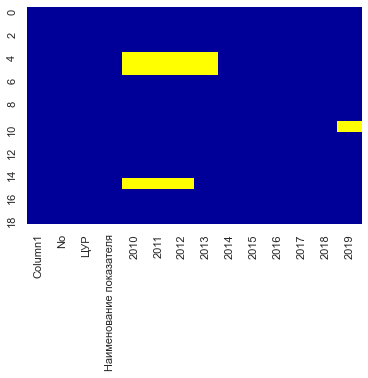

In [15]:
# желтый - пропущенные данные
colours = ['#000099', '#ffff00'] 
sns.set(font_scale=1)
sns.heatmap(indexes.isnull(), cbar=False, cmap=sns.color_palette(colours))
plt.show()

In [16]:
#  заполняем пропуски медианными значениями по строкам
indexes_a = indexes.T.fillna(indexes.median(axis=1)).T
indexes_a.iloc[:,4:].head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1.8,1.5,1.4,1.2,1.1,1.2,1.0,0.9,0.894129,0.4786
1,14.0,13.5,14.4,14.3,14.1,12.2,10.8,10.22,9.7,9.2
2,68.94,69.8,70.24,70.76,70.93,71.39,71.87,72.7,72.91,73.34
3,634.0,600.9,575.7,560.9,565.6,546.7,525.3,484.5,482.2,470.0
4,20.5,20.5,20.5,20.5,19.1,19.5,20.1,20.9,22.195994,24.154631


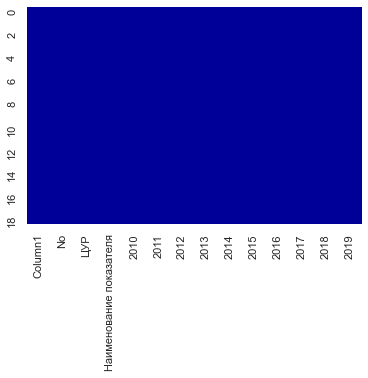

In [17]:
# желтый - пропущенные данные
colours = ['#000099', '#ffff00'] 
sns.heatmap(indexes_a.isnull(), cbar=False, cmap=sns.color_palette(colours))
plt.show()

In [18]:
# т.к. названия показателя длинное при помощи среза уменьшим длину
indexes_a['Наименование показателя'] = indexes[('No')].astype(str) + indexes['Наименование показателя'].str[:40]
indexes_b = indexes_a.iloc[:,3:]
indexes_b = indexes_b.set_index('Наименование показателя')
# транспонируем дата-фрейм
indexes_b = indexes_b.T
indexes_b = indexes_b.astype(float, copy=True, errors='raise')
indexes_b

Наименование показателя,"2Доля домохозяйств, указавших при оценке",3Смертность от дорожно-транспортных проис,3Ожидаемая продолжительность жизни при ро,3Смертность населения в трудоспособном во,4Чистый охват детей в возрасте до 3-х лет,4Валовой коэффициент охвата образовательн,"8Производственный травматизм, человек/год",8Уровень безработицы (8.5.2) 3),9Общая протяженность автомобильных дорог,9Грузооборот по видам транспорта,9Объем выбросов парниковых газов (тонн CO,"9Доля лиц (домохозяйств), имеющих доступ",10Коэффициент дифференциации доходов (по 1,"11Численность населения, проживающего в не",12Объекты туризма,12Количество посетителей объектов эк и тур,"17ВРП на душу населения, рублей","17Доля национального бюджета, финансируема","17Доля населения, пользующегося сетью «Ин"
2010,1.800000,14.00,68.94,634.0,20.500000,42.800000,224.8,7.3454,280537.8,4752.0,44.4,37.0,16.6,59.5,1462.0,5242193.0,263828.6,55.91,50.2
2011,1.500000,13.50,69.80,600.9,20.500000,42.800000,206.2,6.4957,381829.6,4915.0,35.2,45.7,16.2,55.1,1521.0,5242193.0,317515.3,57.07,50.2
2012,1.400000,14.40,70.24,575.7,20.500000,42.800000,186.2,5.4583,723573.3,5056.0,31.5,52.8,16.4,58.8,1579.0,5242193.0,348641.5,53.99,55.1
2013,1.200000,14.30,70.76,560.9,20.500000,42.800000,167.1,5.4780,843070.3,5084.0,28.6,58.9,16.1,54.2,1699.0,5242193.0,377006.0,53.31,64.0
2014,1.100000,14.10,70.93,565.6,19.100000,41.400000,144.6,5.1564,884272.9,5080.0,26.4,62.8,15.8,19.2,1594.0,3799011.0,405147.7,53.85,67.2
2015,1.200000,12.20,71.39,546.7,19.500000,42.600000,135.0,5.5674,912881.6,5108.0,25.2,64.5,15.5,17.1,1697.0,4871976.0,449097.9,57.63,70.1
2016,1.000000,10.80,71.87,525.3,20.100000,42.600000,128.3,5.5372,933973.8,5198.0,24.4,68.0,15.5,16.4,1784.0,5358737.0,472049.9,57.87,73.1
2017,0.900000,10.22,72.70,484.5,20.900000,43.000000,118.6,5.2000,943749.5,5488.0,23.4,70.4,15.4,13.5,1802.0,6416844.0,508009.4,62.09,76.0
2018,0.894129,9.70,72.91,482.2,22.195994,43.273522,116.9,4.8000,966717.6,5635.0,21.2,73.9,15.6,13.4,1875.0,6386429.0,578740.0,63.24,80.9
2019,0.478600,9.20,73.34,470.0,24.154631,43.562976,101.7,4.6000,976728.1,5678.0,26.4,76.9,15.4,10.6,1917.0,8357282.0,646144.1,69.95,82.6


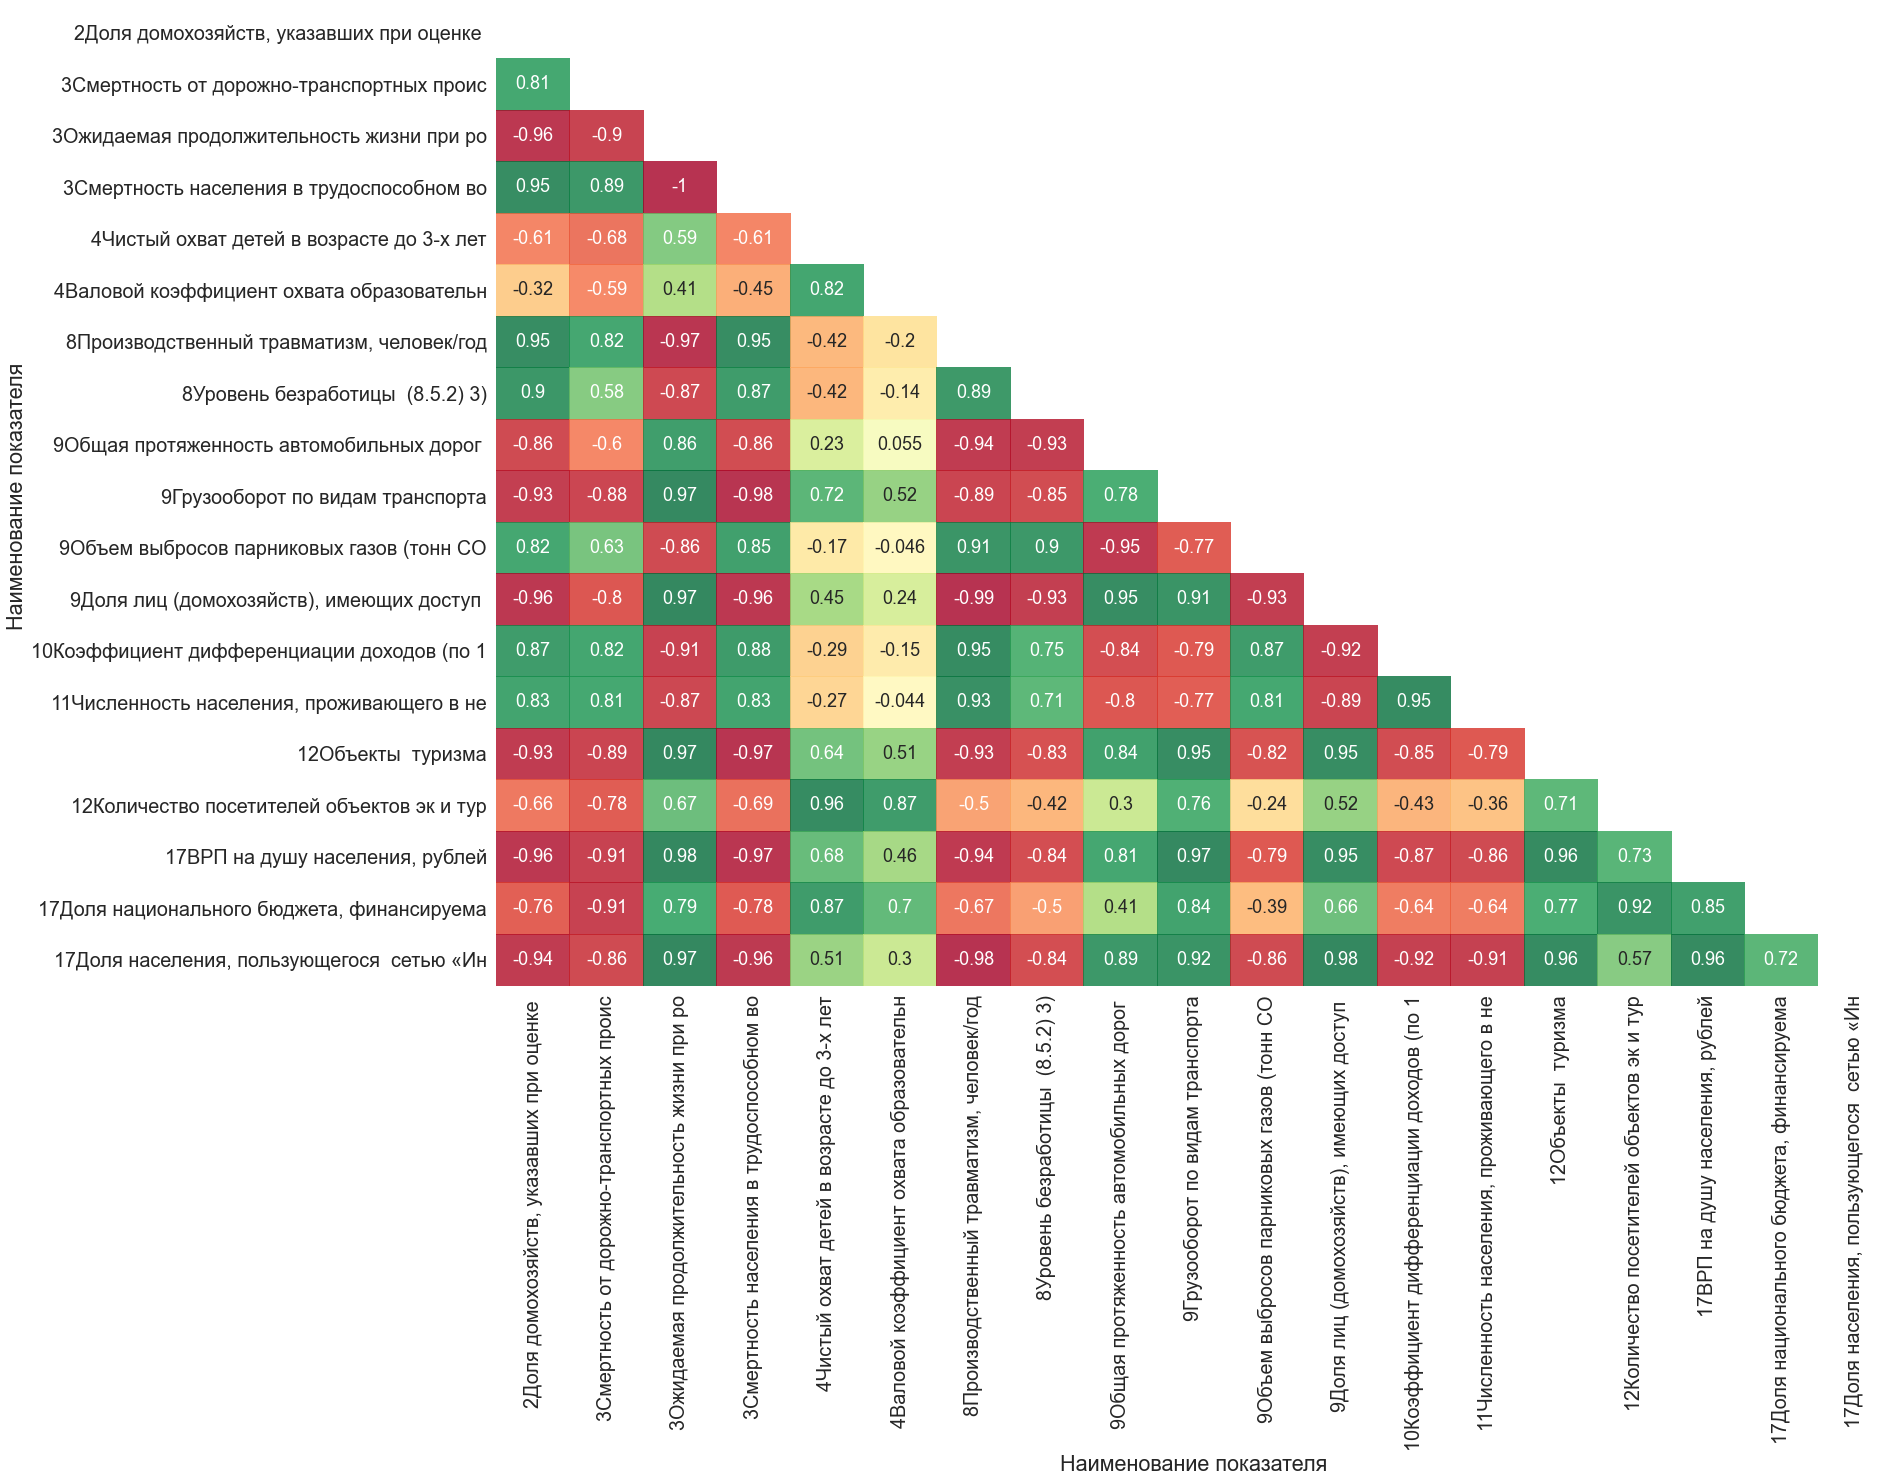

In [19]:
# строим матрицу корреляции
df_corr = indexes_b.corr()
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
plt.figure(figsize=(25,18))
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, center=0, annot=True,cmap='RdYlGn',cbar=False, mask=mask,annot_kws={'fontsize':18}, alpha=0.8)
plt.show()

In [20]:
# сохраняем пары с наиболее сильными (>0.8) корр. связи в дата-фрейм
result_df = []
for i in indexes_b[:]:
    for j in indexes_b[:]:
        curr_corr = indexes_b[i].corr(indexes_b[j])
        if abs(curr_corr) >= 0.8 and i != j:
            result_df.append([i, j, curr_corr])
            corr_pairs = pd.DataFrame(result_df)
corr_pairs.head()

# c = corr_pairs.sort_values(0, ascending=False)
# c.to_excel('corr_0.8.xlsx')

,0,1,2
0,"2Доля домохозяйств, указавших при оценке",3Смертность от дорожно-транспортных проис,0.806149
1,"2Доля домохозяйств, указавших при оценке",3Ожидаемая продолжительность жизни при ро,-0.960437
2,"2Доля домохозяйств, указавших при оценке",3Смертность населения в трудоспособном во,0.947664
3,"2Доля домохозяйств, указавших при оценке","8Производственный травматизм, человек/год",0.948151
4,"2Доля домохозяйств, указавших при оценке",8Уровень безработицы (8.5.2) 3),0.902388


# **ПРОГНОЗ НА 2020-2022**

In [21]:
to_fill_indexes.columns

Index(['Доля населения, живущего за национальной чертой бедности, за год, предшествующий предыдущему (1.2.1) , %',
       'Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации (за исключением субсидий)*, %',
       'Реальные денежные доходы населения, в процентах к предыдущему периоду',
       'Соотношение денежных доходов малоимущих домашних хозяйств с величиной прожиточного минимума',
       'Удельный вес социальных выплат в % к ВВП',
       'Индекс производства продукции сельского хозяйства в сопоставимых ценах к предыдущему году',
       'Доля домохозяйств, указавших при оценке своего материального положения на нехватку денег на еду ',
       'Санитарное состояние питьевого водоснабжения, число проб (из распределительной сети), не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб по суммарной бет

# ПРИМЕР НА ПОКАЗАТЕЛЕ ПО ДОЛЕ ВЗРОСЛЫХ....
ДАЛЬШЕ ВЫВОД ФУНКЦИИ ДЛЯ ЛЮБОЙ КОЛОНКИ ДФ (на заполненном датафрейме)

In [22]:
ind441 = to_fill_indexes[['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % ']].dropna()
ind441
#скользящая средняя при размере окна 3
ind441['rolling_mean3'] = ind441.iloc[:, 0].rolling(3, win_type='triang').mean()

# добавим строки 2020-2022
tr_df = ind441.T
tr_df[2020], tr_df[2021], tr_df[2022] = 0,0,0
ind441 = tr_df.T
ind441

# расчет относительной ошибки
ind441['e3'] = (ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % '] - ind441['rolling_mean3']) / ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % ']

#средняя относительная ошибка при размере окна 3:
print('Средняя относительная ошибка при размере окна 3', ind441['e3'].sum() / len(ind441['e3'].notna()))

#Допустимый размер ошибки (меньше 10%)

# Экстраполяция
# прогноз на 2020:
ind441.iloc[-3, 0] = (round(ind441['rolling_mean3'].iloc[-4] + 1 / 3 * (ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % '].iloc[-4] - ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % '].iloc[-5]), 2))
#скользящая средняя при размере окна 3
ind441['rolling_mean3'] = ind441.iloc[:, 0].rolling(3, win_type='triang').mean()

ind441.iloc[-2, 0] = (round(ind441['rolling_mean3'].iloc[-3] + 1 / 3 * (ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % '].iloc[-3] - ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % '].iloc[-4]), 2))
#скользящая средняя при размере окна 3
ind441['rolling_mean3'] = ind441.iloc[:, 0].rolling(3, win_type='triang').mean()
ind441.iloc[-1, 0] = (round(ind441['rolling_mean3'].iloc[-2] + 1 / 3 * (ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % '].iloc[-2] - ind441['Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в % '].iloc[-3]), 2))
#скользящая средняя при размере окна 3
ind441['rolling_mean3'] = ind441.iloc[:, 0].rolling(3, win_type='triang').mean()
prog_441 = ind441.iloc[:, :2]
prog_441

Средняя относительная ошибка при размере окна 3 0.00749706787324606


Наименование показателя,"Доля взрослых, обладающих навыками в области информационно-коммуникационных технологий (4.4.1), в %",rolling_mean3
2013,69.30,NaN
2014,70.70,NaN
2015,72.70,70.8500
2016,74.30,72.6000
2017,75.50,74.2000
2018,77.30,75.6500
2019,75.50,76.4000
2020,75.80,76.0250
2021,76.12,75.8050
2022,75.91,75.9875


# ФУНКЦИЯ ПРОГНОЗИРОВАНИЯ

In [23]:
# загоним в фукнцию
def prog(col):
  ind = to_fill_indexes[[col]].dropna()
  
  #скользящая средняя при размере окна 3
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()
  
  # добавим строки 2020-2022
  tr_df = ind.T
  tr_df[2020], tr_df[2021], tr_df[2022] = 0,0,0
  ind = tr_df.T

  # расчет относительной ошибки
  ind['e3'] = -(ind[col] - ind['rolling_mean3']) / ind[col]
  
  #средняя относительная ошибка при размере окна 3 (не больше 10%)
  print('Cредняя относительная ошибка при размере окна 3', ind['e3'].sum() / len(ind['e3'].notna()))

  # Экстраполяция
  # прогноз на 2020:
  ind.iloc[-3, 0] = (round(ind['rolling_mean3'].iloc[-4] + 1 / 3 * (ind[col].iloc[-4] - ind[col].iloc[-5]), 2))
  #обновляем скользящие средние
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()

  # прогноз на 2021:
  ind.iloc[-2, 0] = (round(ind['rolling_mean3'].iloc[-3] + 1 / 3 * (ind[col].iloc[-3] - ind[col].iloc[-4]), 2))
  #обновляем скользящие средние
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()

  # прогноз на 2022:
  ind.iloc[-1, 0] = (round(ind['rolling_mean3'].iloc[-2] + 1 / 3 * (ind[col].iloc[-2] - ind[col].iloc[-3]), 2))
  #обновляем скользящие средние
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()
  return ind

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from textwrap import fill

In [25]:
#функция отрисовки графика. На вход подается датафрейм, индексы - года. Последние 3 года - прогноз. Столбец 0 - факт.значения показателя, столбец 1 - скользящая средняя, столбец 2 - по необходимости
def drawgraph(df):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) #формируем область рисования графиков

    #устанавливаем размер фигуры
    fig.set_figheight(10) 
    fig.set_figwidth(10)

    #значения по оси х
    x_val = df.index.tolist()
    
    #Прорисовка верхнего графика (без прогноза)
    ax1.plot(x_val[:-3], df.iloc[:-3,0], label = 'Фактические значения')
    ax1.plot(x_val[:-3], df.iloc[:-3,1], color = 'red', label = 'Скользящая средняя', linestyle='-')
    #ax1.plot(x_val, df.iloc[:-3,2], color = 'm', label = 'Тренд', linestyle='--')
    
    #форматирование заголовка
    new_title = fill(df.columns[0],80)
    
    ax1.set_title(new_title)
    ax1.legend(loc="lower right")
    ax1.grid(axis='both', linewidth=0.5, linestyle='--', color='grey')
    ax1.tick_params(which='major', width=1.00, length=5)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
    #Прорисовка нижнего графика
    ax2.plot(x_val, df[df.columns[0]], color = 'green')
   
    ax2.set_title('Прогноз методом скользящей средней')
    ax2.set_xlabel('год')
    #ax2.legend(loc="lower right")
    ax2.grid(axis='both', linewidth=0.5, linestyle='--', color='grey')
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show
    
    return
    

# РАСЧЕТЫ И ГРАФИКИ

In [26]:
filled_indexes.columns.to_list()

['Доля населения, живущего за национальной чертой бедности, за год, предшествующий предыдущему (1.2.1) , %',
 'Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации (за исключением субсидий)*, %',
 'Реальные денежные доходы населения, в процентах к предыдущему периоду',
 'Соотношение денежных доходов малоимущих домашних хозяйств с величиной прожиточного минимума',
 'Удельный вес социальных выплат в % к ВВП',
 'Индекс производства продукции сельского хозяйства в сопоставимых ценах к предыдущему году',
 'Доля домохозяйств, указавших при оценке своего материального положения на нехватку денег на еду ',
 'Санитарное состояние питьевого водоснабжения, число проб (из распределительной сети), не соответствующих гигиеническим нормативам в процентах от общего числа исследованных проб по суммарной бета-активности',
 'Санитарное состояние атмосферно

In [27]:
ind_pr =  'Валовой коэффициент охвата образовательными программами высшего образования - программами бакалавриата, специалитета, магистратуры, в %'
prog_ind= prog(ind_pr).reset_index().rename(columns={'index' : 'Year', ind_pr : 'Ind'}).astype({'Year' : 'int64'})
prog(ind_pr).to_excel('pr_ipt.xlsx')

Cредняя относительная ошибка при размере окна 3 -5.2932512087582734e-05
Cредняя относительная ошибка при размере окна 3 -5.2932512087582734e-05


Cредняя относительная ошибка при размере окна 3 -5.2932512087582734e-05


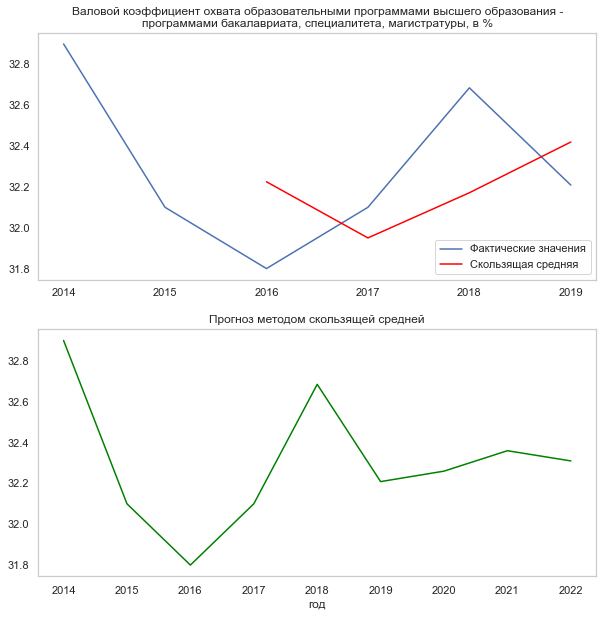

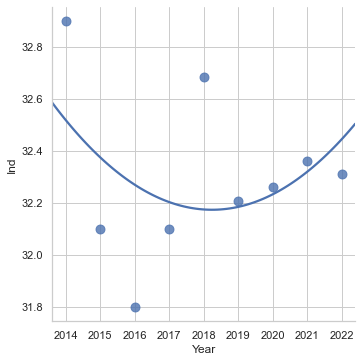

In [28]:
sns.set_theme(style="whitegrid")

drawgraph(prog(ind_pr))
sns.lmplot(x='Year', y= 'Ind', data=prog_ind, order=2, ci=None, scatter_kws={"s": 80}, truncate=False)



In [29]:
prod = (pd.read_excel('pr_ipt.xlsx').iloc[:1].T.reset_index().iloc[1:]
        .rename(columns={'index' : 'Наименование показателя', 0 : 'Индекс производительности труда в целом по всем видам деятельности, %'}))

prod.set_index('Наименование показателя', inplace=True)
prod

,"Индекс производительности труда в целом по всем видам деятельности, %"
Наименование показателя,
"Валовой коэффициент охвата образовательными программами высшего образования - программами бакалавриата, специалитета, магистратуры, в %",32.9
rolling_mean3,NaN
e3,NaN


In [30]:
def prog_ind(col, df, start):
  ind = df.fillna(0)
  
  #скользящая средняя при размере окна 3
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()
  
  # добавим строки 2020-2022
  tr_df = ind.T
  tr_df[start], tr_df[start+1], tr_df[start+2] = 0,0,0
  ind = tr_df.T

  # расчет относительной ошибки
  ind['e3'] = -(ind[col] - ind['rolling_mean3']) / ind[col]
  
  #средняя относительная ошибка при размере окна 3 (не больше 10%)
  print("средняя относительная ошибка при размере окна 3", ind['e3'].sum() / len(ind['e3'].notna()))

  # Экстраполяция
  # прогноз на год-start:
  ind.iloc[-3, 0] = (round(ind['rolling_mean3'].iloc[-4] + 1 / 3 * (ind[col].iloc[-4] - ind[col].iloc[-5]), 2))
  #обновляем скользящие средние
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()

  # прогноз на start+1:
  ind.iloc[-2, 0] = (round(ind['rolling_mean3'].iloc[-3] + 1 / 3 * (ind[col].iloc[-3] - ind[col].iloc[-4]), 2))
  #обновляем скользящие средние
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()

  # прогноз на start+2:
  ind.iloc[-1, 0] = (round(ind['rolling_mean3'].iloc[-2] + 1 / 3 * (ind[col].iloc[-2] - ind[col].iloc[-3]), 2))
  #обновляем скользящие средние
  ind['rolling_mean3'] = ind.iloc[:, 0].rolling(3, win_type='triang').mean()
  return ind

In [31]:
prognose = prog_ind('Индекс производительности труда в целом по всем видам деятельности, %', prod, 2021)
prognose.to_excel('pr_ipt.xlsx')

средняя относительная ошибка при размере окна 3 inf


In [32]:
prognose.reset_index().rename(columns={'Наименование показателя' : "Year", 'Индекс производительности труда в целом по всем видам деятельности, %' : 'Ind'}).astype({'Year' : 'object'})

,Year,Ind,rolling_mean3,e3
0,Валовой коэффициент охвата образовательными пр...,32.90,NaN,NaN
1,rolling_mean3,0.00,NaN,NaN
2,e3,0.00,8.2250,inf
3,2021,8.22,2.0550,NaN
4,2022,4.80,5.3100,NaN
5,2023,4.17,5.4975,NaN
